# Sales Forecasting Analysis 

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df= pd.read_csv("E:\sql24-45\RSF Project\sales_forecast_dataset.csv")

In [3]:
df.head()

,Month,City,State,Sales,Marketing_Spend,Customer_Count,Product_Category,Email
0,2023-11-01,Jaipur,Rajasthan,29878,2790,106,Grocery,hunar.baral@renusharmafoundation.org
1,2022-09-01,Delhi,Delhi,43635,4706,270,Home Decor,alia.iyengar@renusharmafoundation.org
2,2022-04-01,Lucknow,Uttar Pradesh,48832,2540,453,Electronics,romil.mahajan@renusharmafoundation.org
3,2024-05-01,Delhi,Delhi,56112,6382,297,Clothing,fateh.raju@yahoo.com
4,2021-02-01,Kolkata,West Bengal,59156,4038,114,Electronics,dharmajan.chaudhary@yahoo.com


In [4]:
df.shape

(1050, 8)

## 1). Initial Data Cleaning 

In [5]:
print(df.isnull().sum())

Month               0
City                0
State               0
Sales               0
Marketing_Spend     0
Customer_Count      0
Product_Category    0
Email               0
dtype: int64


#### There are no missing values , in our dataset 

In [6]:
# Count completely duplicated rows (all values the same)
total_duplicates = df.duplicated().sum()
print(f"Total fully duplicated rows: {total_duplicates}")

Total fully duplicated rows: 0


#### There are no fully duplicate rows 

In [7]:
df.dtypes

Month               object
City                object
State               object
Sales                int64
Marketing_Spend      int64
Customer_Count       int64
Product_Category    object
Email               object
dtype: object

#### Here the month column which contain date shows 'object' data type 

### → Now have to change the data type of month column 

In [8]:
# change 'Month' column to datetime type
df['Month'] = pd.to_datetime(df['Month'])

In [9]:
df.head()

,Month,City,State,Sales,Marketing_Spend,Customer_Count,Product_Category,Email
0,2023-11-01,Jaipur,Rajasthan,29878,2790,106,Grocery,hunar.baral@renusharmafoundation.org
1,2022-09-01,Delhi,Delhi,43635,4706,270,Home Decor,alia.iyengar@renusharmafoundation.org
2,2022-04-01,Lucknow,Uttar Pradesh,48832,2540,453,Electronics,romil.mahajan@renusharmafoundation.org
3,2024-05-01,Delhi,Delhi,56112,6382,297,Clothing,fateh.raju@yahoo.com
4,2021-02-01,Kolkata,West Bengal,59156,4038,114,Electronics,dharmajan.chaudhary@yahoo.com


In [10]:
df.dtypes

Month               datetime64[ns]
City                        object
State                       object
Sales                        int64
Marketing_Spend              int64
Customer_Count               int64
Product_Category            object
Email                       object
dtype: object

#### Now, 'month' column is change into datetime format 

###  → droping the Unnecessary Columns which is not usefull for our analysis 

In [11]:
df = df.drop(columns=['Email'])
df.head()

,Month,City,State,Sales,Marketing_Spend,Customer_Count,Product_Category
0,2023-11-01,Jaipur,Rajasthan,29878,2790,106,Grocery
1,2022-09-01,Delhi,Delhi,43635,4706,270,Home Decor
2,2022-04-01,Lucknow,Uttar Pradesh,48832,2540,453,Electronics
3,2024-05-01,Delhi,Delhi,56112,6382,297,Clothing
4,2021-02-01,Kolkata,West Bengal,59156,4038,114,Electronics


### → Just checking if there are any outliers in out data set , if yes we will counter them later when we making model 

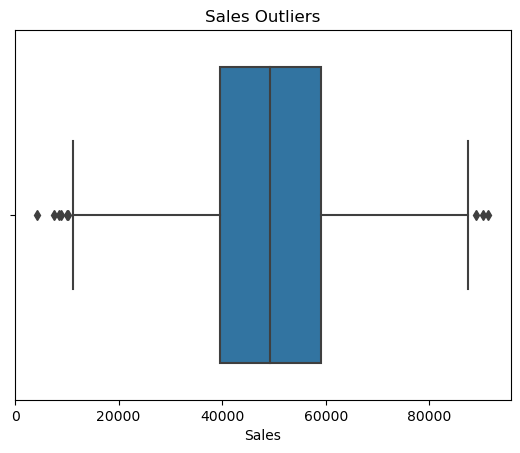

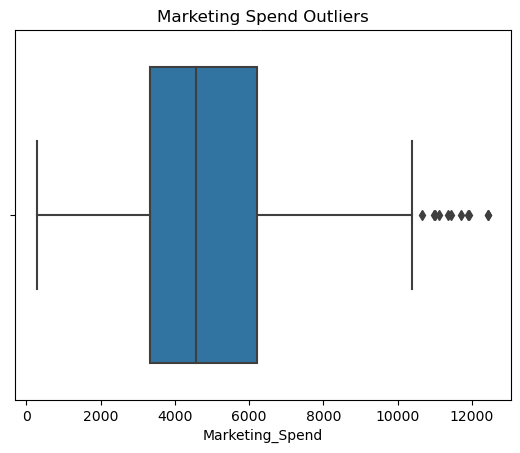

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for outliers in Sales
sns.boxplot(x=df['Sales'])
plt.title("Sales Outliers")
plt.show()

# Check for outliers in Marketing Spend
sns.boxplot(x=df['Marketing_Spend'])
plt.title("Marketing Spend Outliers")
plt.show()

#### So, the low sales (< 20,000) , high sales (> 85,000) and high 'marketing_spend' (>10000) values are considered outliers

In [13]:
monthly_sales = df.groupby('Month')['Sales'].sum()
print(monthly_sales)

Month
2021-01-01    1154679
2021-02-01    1631899
2021-03-01    1149160
2021-04-01    1183323
2021-05-01     603874
2021-06-01    1164659
2021-07-01    1028896
2021-08-01    1004964
2021-09-01    1533066
2021-10-01    1126894
2021-11-01     876953
2021-12-01     980498
2022-01-01    1257619
2022-02-01     638418
2022-03-01    1015497
2022-04-01    1150775
2022-05-01    1074985
2022-06-01    1212150
2022-07-01    1229471
2022-08-01    1023303
2022-09-01     960283
2022-10-01     904393
2022-11-01    1181474
2022-12-01     998042
2023-01-01    1206968
2023-02-01    1208091
2023-03-01    1122037
2023-04-01    1126787
2023-05-01    1213884
2023-06-01     745608
2023-07-01     591866
2023-08-01     732793
2023-09-01    1226076
2023-10-01    1381062
2023-11-01     927783
2023-12-01    1240045
2024-01-01    1087215
2024-02-01    1077675
2024-03-01     891287
2024-04-01     948769
2024-05-01    1209638
2024-06-01    1210182
2024-07-01    1193197
2024-08-01    1124617
2024-09-01     500024
2024

## 2).  Sales Forecast Modeling(ARIMA)

C:\Users\pradeep nagarkoti\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pradeep nagarkoti\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pradeep nagarkoti\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


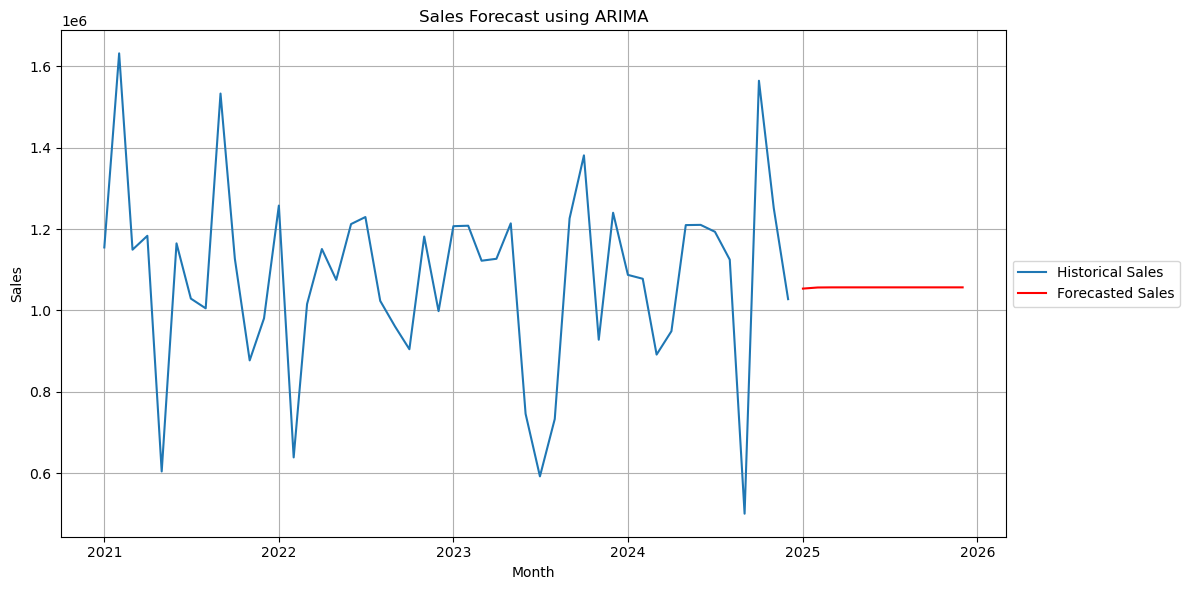

In [14]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


# Step 1: Fit ARIMA model
model = ARIMA(monthly_sales, order=(1, 1, 1))  # (p, d, q)
model_fit = model.fit()

# Step 2: Forecast next 12 months 
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Step 3: Plot original data + forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Historical Sales')
plt.plot(forecast.index, forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecast using ARIMA')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)

# Move legend outside the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

#### The ARIMA model forecasts a flat sales trend for 2025, suggesting no strong upward or downward movement based on past data. Historical sales show high fluctuations, which may require seasonal adjustments for better accuracy.

## 3).  Decomposition of Trend and Seasonality

C:\Users\pradeep nagarkoti\AppData\Local\Temp\ipykernel_6752\567328738.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


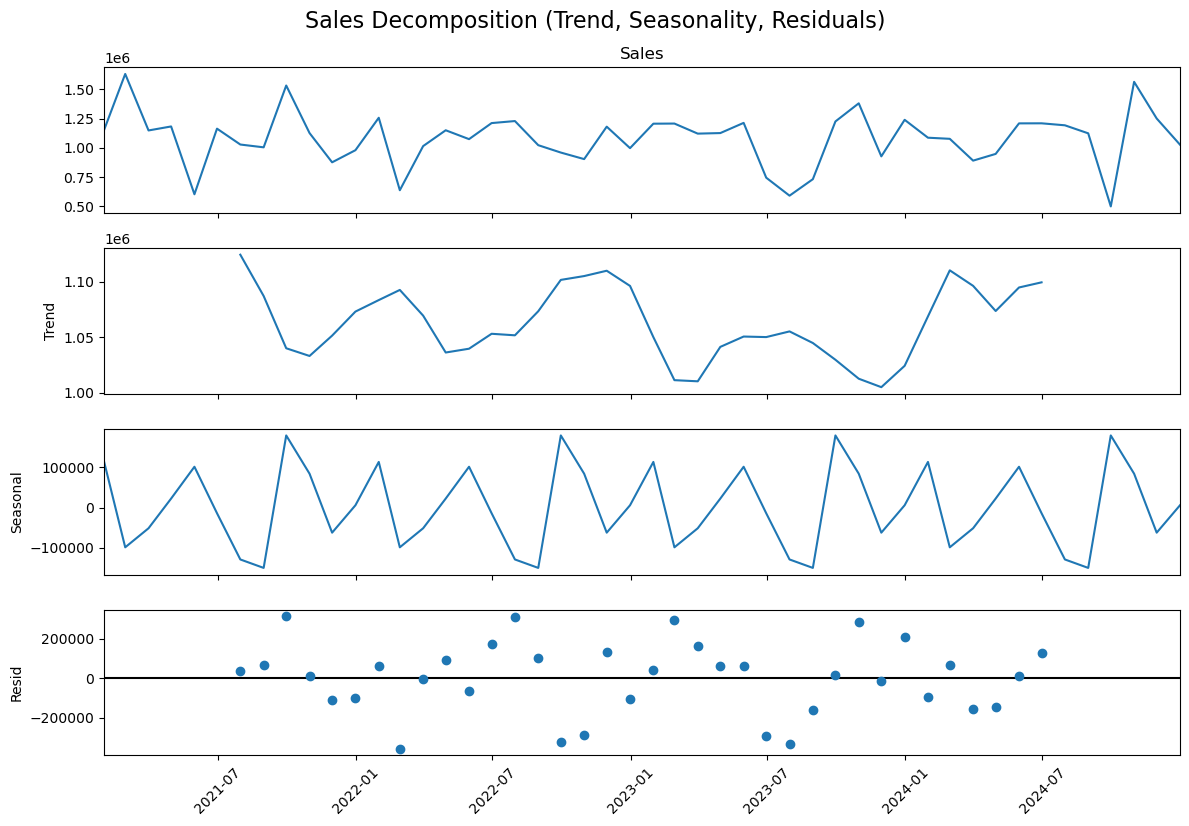

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


df.set_index('Month', inplace=True)

# Step 2: Aggregate monthly sales
monthly_sales = df['Sales'].resample('M').sum()

# Step 3: Decompose the sales time series
decomposition = seasonal_decompose(monthly_sales, model='additive')

# Step 4: Plot with improved layout
fig = decomposition.plot()
fig.set_size_inches(12, 8)  # Make the whole figure larger

# Step 5: Improve title and x-axis readability
plt.suptitle('Sales Decomposition (Trend, Seasonality, Residuals)', fontsize=16)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels

plt.show()



#### Sales go up and down often, showing a lot of changes over time.
#### Trend line stays mostly stable, with some small ups and downs — no big long-term growth or drop.
#### Seasonality shows a clear repeating pattern, meaning sales follow a regular monthly cycle.
#### Residuals (random noise) are small and spread around zero, which means the model explains the data well.


In [16]:
df.head()

,City,State,Sales,Marketing_Spend,Customer_Count,Product_Category
Month,,,,,,
2023-11-01,Jaipur,Rajasthan,29878,2790,106,Grocery
2022-09-01,Delhi,Delhi,43635,4706,270,Home Decor
2022-04-01,Lucknow,Uttar Pradesh,48832,2540,453,Electronics
2024-05-01,Delhi,Delhi,56112,6382,297,Clothing
2021-02-01,Kolkata,West Bengal,59156,4038,114,Electronics


In [17]:
#df_reset = df.reset_index()
#df_reset.to_excel('sales_forecast_final.xlsx', index=False)

In [22]:
# If Month is index and you need it as a column again
df.reset_index(inplace=True)

In [23]:
df.head()

,Month,City,State,Sales,Marketing_Spend,Customer_Count,Product_Category
0,2023-11-01,Jaipur,Rajasthan,29878,2790,106,Grocery
1,2022-09-01,Delhi,Delhi,43635,4706,270,Home Decor
2,2022-04-01,Lucknow,Uttar Pradesh,48832,2540,453,Electronics
3,2024-05-01,Delhi,Delhi,56112,6382,297,Clothing
4,2021-02-01,Kolkata,West Bengal,59156,4038,114,Electronics
